In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
used_car_data = pd.read_csv('/Users/sumanth/Documents/TF-Udemy/DataSets/second_hand_cars.csv')
used_car_data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
used_car_data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [7]:
# to get an idea on how relevant rating and condition columns are in this dataset
used_car_data['price drop %'] = (used_car_data['on road old']-used_car_data['current price'])/used_car_data['on road old']

used_car_data['cheaper to new %'] = (used_car_data['on road now']-used_car_data['current price'])/used_car_data['on road now']


In [9]:
used_car_data.groupby(by=['condition'])[['on road old','on road now','current price','price drop %','cheaper to new %']].mean()


,on road old,on road now,current price,price drop %,cheaper to new %
condition,,,,,
1,611306.510417,803449.437500,300204.156250,0.507782,0.628881
2,604543.318182,803124.261364,305159.181818,0.498916,0.617646
3,590461.547368,795810.442105,287447.600000,0.513494,0.639548
4,605586.924731,797045.225806,291880.182796,0.515775,0.633306
5,603433.688073,794010.422018,297117.229358,0.506634,0.628387
6,597238.144068,792494.805085,298804.411017,0.496582,0.625985
7,591114.062500,809409.208333,308089.260417,0.477962,0.620537
8,606050.010000,800963.310000,314302.645000,0.481170,0.609986
9,607943.875000,801268.321429,339313.821429,0.443937,0.578681


In [10]:
used_car_data.groupby(by=['rating'])[['on road old','on road now','current price','price drop %','cheaper to new %']].mean()


,on road old,on road now,current price,price drop %,cheaper to new %
rating,,,,,
1,605676.840796,795034.213930,303214.502488,0.499021,0.619481
2,606849.497462,800263.131980,298811.502538,0.509538,0.627307
3,598712.504902,804405.784314,314609.504902,0.475147,0.611485
4,597036.827751,790582.138756,314878.672249,0.474394,0.603669
5,600210.804233,806070.031746,310678.730159,0.477893,0.614703


As per the above, we can conclude that condition of the car has some effect on the the current price w.r.t. old on-road or new on-road price

While rating has no effect on the target variable

In [11]:
used_car_data.shape

(1000, 14)

In [13]:
len(used_car_data)

1000

In [44]:
used_car_data.iloc[:,1:-3]

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,535651,798186,3,78945,1,2,14,177,73,123
1,591911,861056,6,117220,5,9,9,148,74,95
2,686990,770762,2,132538,2,8,15,181,53,97
3,573999,722381,4,101065,4,3,11,197,54,116
4,691388,811335,6,61559,3,9,12,160,53,105
...,...,...,...,...,...,...,...,...,...,...
995,633238,743850,5,125092,1,6,11,171,95,97
996,599626,848195,4,83370,2,9,14,161,101,120
997,646344,842733,7,86722,1,8,9,196,113,89
998,535559,732439,2,140478,4,5,9,184,112,128


In [47]:
no_of_features = used_car_data.iloc[:,1:-3].shape[-1]
no_of_features

10

In [45]:
used_car_data.iloc[:,-3].to_frame()

,current price
0,351318.0
1,285001.5
2,215386.0
3,244295.5
4,531114.5
...,...
995,190744.0
996,419748.0
997,405871.0
998,74398.0


In [15]:
# to work completely on tensorflow/keras libraries, need to create a tensorflow dataset, 
# it is much efficient in computation on large datasets, but reduces the flexibility to access data easily
tensor_dataset = tf.data.Dataset.from_tensor_slices((used_car_data.iloc[:,1:-3],used_car_data.iloc[:,-3]))
for x,y in tensor_dataset.take(3):
    print(x)
    print(y)

tf.Tensor([535651 798186      3  78945      1      2     14    177     73    123], shape=(10,), dtype=int64)
tf.Tensor(351318.0, shape=(), dtype=float64)
tf.Tensor([591911 861056      6 117220      5      9      9    148     74     95], shape=(10,), dtype=int64)
tf.Tensor(285001.5, shape=(), dtype=float64)
tf.Tensor([686990 770762      2 132538      2      8     15    181     53     97], shape=(10,), dtype=int64)
tf.Tensor(215386.0, shape=(), dtype=float64)


2025-07-26 16:47:58.171548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
train_set,test_set  = tf.keras.utils.split_dataset(dataset=tensor_dataset,left_size=0.75,shuffle=True,seed=42)

2025-07-26 16:47:58.216709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
for x,y in train_set.take(3):
    print(x)
    print(y)

tf.Tensor([693495 830322      6  77570      5      3      9    182    109     79], shape=(10,), dtype=int64)
tf.Tensor(449650.0, shape=(), dtype=float64)
tf.Tensor([502281 759393      7  61910      5      4     10    162    113    106], shape=(10,), dtype=int64)
tf.Tensor(377108.5, shape=(), dtype=float64)
tf.Tensor([522690 700733      3  62161      1      2      8    170    120     94], shape=(10,), dtype=int64)
tf.Tensor(363186.5, shape=(), dtype=float64)


2025-07-26 16:47:58.233261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [95]:
def train_cv_test_split(data,train_ratio,cv_ratio):
    if train_ratio<1 and cv_ratio<1 and train_ratio+cv_ratio<1:
        train , intermediate = tf.keras.utils.split_dataset(dataset=data,
                                                        left_size=train_ratio,shuffle=True,seed=42)
        cv , test = tf.keras.utils.split_dataset(dataset=intermediate,
                                                 left_size=int(cv_ratio*tensor_dataset.cardinality().numpy()))
        return train, cv, test
    else:
        return "Ratio not appropriate"

In [96]:
try :
    train_set, cv_set, test_set = train_cv_test_split(tensor_dataset,train_ratio=0.9,cv_ratio=0.1)
    repeat = False
except ValueError:
    print(train_cv_test_split(True,True, True))
    repeat = True

Ratio not appropriate


In [97]:
try :
    train_set, cv_set, test_set = train_cv_test_split(tensor_dataset,train_ratio=0.7,cv_ratio=0.15)
except ValueError:
    print(train_cv_test_split(True,True, True)) 

2025-07-26 18:55:11.809439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-07-26 18:55:11.836807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [102]:
print(f'Samples in \nTrain set : {train_set.cardinality().numpy()}\nCV set : {cv_set.cardinality().numpy()}\nTest set : {test_set.cardinality().numpy()}')


Samples in 
Train set : 700
CV set : 150
Test set : 150


* Normalization in Tensorflow/Keras is Standardization (StandardScaler from sklearn), i.e (X-X_mean)/X_StdDeviation
* To perform Min_Max (Normalization) scaling (MinMaxScaler from sklearn), need to write custom code, i.e (X-X_min)/(X_max-X_min)

In [103]:
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(train_set.map(lambda x,y : x))

2025-07-26 18:58:39.644909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [104]:
# making sure that only features are normalised, and not the target 
def apply_normalisation(x,y):
    return normaliser(x),y

In [105]:
train_set = train_set.map(apply_normalisation)

In [106]:
# extra dimension has been added, i.e. features size gone to (1,10) from (10,)
for x,y in train_set.take(3):
    print(x)
    print(y)

tf.Tensor(
[[ 1.53086     0.5347985   0.8043479  -0.79053515  1.435701   -0.9191458
  -1.191023    0.79848737  1.2174097  -1.1238242 ]], shape=(1, 10), dtype=float32)
tf.Tensor(449650.0, shape=(), dtype=float64)
tf.Tensor(
[[-1.7302333  -0.7056032   1.3824214  -1.331179    1.435701   -0.562295
  -0.74036574 -0.23620598  1.4135401   0.16112892]], shape=(1, 10), dtype=float32)
tf.Tensor(377108.5, shape=(), dtype=float64)
tf.Tensor(
[[-1.3821645  -1.7314454  -0.9298725  -1.3225135  -1.4032557  -1.2759966
  -1.6416804   0.17767134  1.7567685  -0.40996137]], shape=(1, 10), dtype=float32)
tf.Tensor(363186.5, shape=(), dtype=float64)


2025-07-26 18:58:39.675130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [107]:
tf.squeeze(normaliser(x))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-10.296497 , -13.985849 ,  -3.2016275,  -3.4685974,  -3.1089406,
        -2.4450386,  -5.986774 ,  -8.60803  ,  -4.041007 ,  -4.9030123],
      dtype=float32)>

In [108]:
# apply tf.squeeze to reduce the extra dimension
def apply_normalisation(x,y):
    return tf.squeeze(normaliser(x)),y

In [109]:
train_set = train_set.map(apply_normalisation)

In [110]:
for x,y in train_set.take(3):
    print(x)
    print(y)

tf.Tensor(
[-10.296449  -13.985808   -2.1991208  -3.468579   -1.0940216  -2.317696
  -5.783682   -8.575912   -4.067453   -4.9369855], shape=(10,), dtype=float32)
tf.Tensor(449650.0, shape=(), dtype=float64)
tf.Tensor(
[-10.296504  -13.98583    -1.8649517  -3.468598   -1.0940216  -2.1903536
  -5.5805902  -8.629442   -4.057836   -4.875834 ], shape=(10,), dtype=float32)
tf.Tensor(377108.5, shape=(), dtype=float64)
tf.Tensor(
[-10.296497  -13.985849   -3.2016275  -3.4685974  -3.1089406  -2.4450386
  -5.986774   -8.60803    -4.041007   -4.9030123], shape=(10,), dtype=float32)
tf.Tensor(363186.5, shape=(), dtype=float64)


2025-07-26 18:58:39.699538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [120]:
cv_set = cv_set.map(apply_normalisation)

In [121]:
test_set = test_set.map(apply_normalisation)

In [134]:
# batch : Deliver data in mini-batches of BATCH_SIZE
#           makes the computing efficient through parallel computing

# cache : Stores the data and loads it quickly from a cache after the first epoch
#           making subsequent iterations load the data from the cache, 
#           which is much faster than re-reading from the original source

# prefetch(tf.data.AUTOTUNE) : Overlap data loading and model training to maximize efficiency.
#                                Allows elements to be prefetched from the 
#                                input pipeline in the background while the model is training


train_pipeline = train_set.batch(batch_size=32).cache().prefetch(tf.data.AUTOTUNE)
cv_pipeline = cv_set.batch(batch_size=32).cache().prefetch(tf.data.AUTOTUNE)
test_pipeline = test_set.batch(batch_size=32).cache().prefetch(tf.data.AUTOTUNE)

In [112]:
# creating a sequential model to streamline the layers on neural network 
lin_reg_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(no_of_features,)),
    tf.keras.layers.Dense(units=128,activation='relu',name='Layer_1'), 
    tf.keras.layers.Dense(units=128,activation='relu',name='Layer_2'),
    tf.keras.layers.Dense(units=64,activation='relu',name='Layer_3'),
    ])
# can also add a layer like below
lin_reg_model.add(tf.keras.layers.Dense(units=1,activation='linear',name='Output_Layer'))
lin_reg_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241 (102.50 KB)

 Trainable params: 26,241 (102.50 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
adam = tf.keras.optimizers.Adam
lin_reg_model.compile(optimizer=adam(learning_rate=0.001), 
                      loss='mae', # loss to optimize model
                      metrics=[tf.keras.metrics.RootMeanSquaredError]) 
                                  # metric to measure model performance

In [136]:
# validation_split is only supported for tensors or NumPy arrays, so need to split the data before feeding into fit
history = lin_reg_model.fit(train_pipeline, validation_data=cv_pipeline, epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 106699.7578 - root_mean_squared_error: 126879.5391 - val_loss: 301879.5938 - val_root_mean_squared_error: 326079.5312
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106696.8203 - root_mean_squared_error: 126874.1719 - val_loss: 301867.1875 - val_root_mean_squared_error: 326067.5000
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106702.3672 - root_mean_squared_error: 126882.2031 - val_loss: 301860.8125 - val_root_mean_squared_error: 326060.3750
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106699.0469 - root_mean_squared_error: 126879.6562 - val_loss: 301855.0000 - val_root_mean_squared_error: 326053.6250
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106694.8359 - root_mean_squared_error: 126876.0703 - val_loss: 301849.1875 - val_root_mean_squared_error: 326046.9062
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106690.5312 - root_mean_squared_error: 126872.4219 - val_loss:

In [137]:
# loss/metrics shown above during .fit() is the loss of calculated on the last batch of data processed in that epoch
# loss/metrics stored in history is the average loss calculated across all batches within that epoch
history.history['loss']

[105734.6640625,
 105724.4765625,
 105722.1484375,
 105718.515625,
 105714.7109375,
 105710.8671875,
 105706.9453125,
 105707.625,
 105700.8359375,
 105700.4453125]

In [138]:
history.history['val_loss']

[301879.59375,
 301867.1875,
 301860.8125,
 301855.0,
 301849.1875,
 301843.3125,
 301837.34375,
 301819.59375,
 301823.65625,
 301807.21875]

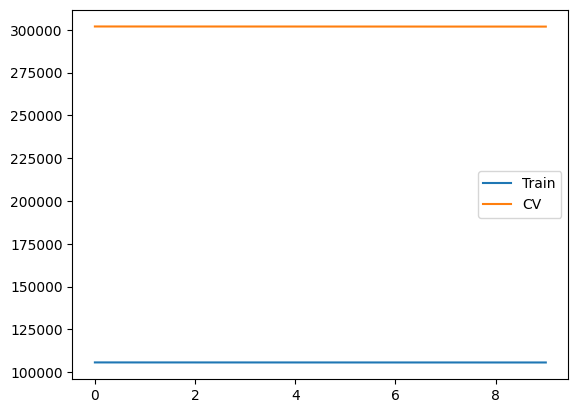

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','CV'])

In [165]:
for metric,value in zip(lin_reg_model.metrics_names,lin_reg_model.evaluate(train_pipeline)):
    print(metric,' : ',value)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106626.4297 - root_mean_squared_error: 126783.0234
loss  :  105618.21875
compile_metrics  :  125304.5625


In [166]:
for metric,value in zip(lin_reg_model.metrics_names,lin_reg_model.evaluate(cv_pipeline)):
    print(metric,' : ',value)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309784.5938 - root_mean_squared_error: 333602.4375 
loss  :  301807.21875
compile_metrics  :  326002.96875


In [169]:
y_test_predicted = lin_reg_model.predict(test_pipeline)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [192]:
y_test_actual = [y for x,y in test_pipeline]
y_test_actual

2025-07-26 20:34:29.465353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[<tf.Tensor: shape=(32,), dtype=float64, numpy=
 array([208189.5, 172415. , 441561.5, 286937.5, 172234.5, 344495. ,
        512492. , 136079. , 180368.5, 235251.5, 324373. , 528770. ,
        229982. , 108894. , 243549.5, 231291.5, 149141.5, 300499.5,
        333091.5, 137514. , 281037.5, 343595. , 515722.5,  70862. ,
        269326. , 444625. , 453672.5, 242950. , 387089. , 230797. ,
        385031. , 406657.5])>,
 <tf.Tensor: shape=(32,), dtype=float64, numpy=
 array([425083.5, 422439.5, 526502.5, 553901. , 472081. , 178991.5,
        299129.5,  98311.5, 224359.5, 240296.5, 464634.5, 413540. ,
        432159.5, 529318.5, 373735. , 344405.5, 272075. , 167794. ,
        136824.5, 584116.5, 549406. , 421679.5, 217562. ,  62737. ,
        584267.5, 215633.5, 228892.5, 179711.5, 475984.5, 349762. ,
        110883.5, 420403. ])>,
 <tf.Tensor: shape=(32,), dtype=float64, numpy=
 array([213739. , 413288. , 218814. , 262126.5, 369571.5, 167998. ,
        293875.5, 475273.5, 501920.5, 344820.5

In [193]:
# data divided into batches, need to unify them into single tensor/array
y_test_actual = tf.concat(values=[x for x in y_test_actual],axis=0)
y_test_actual.shape

TensorShape([150])

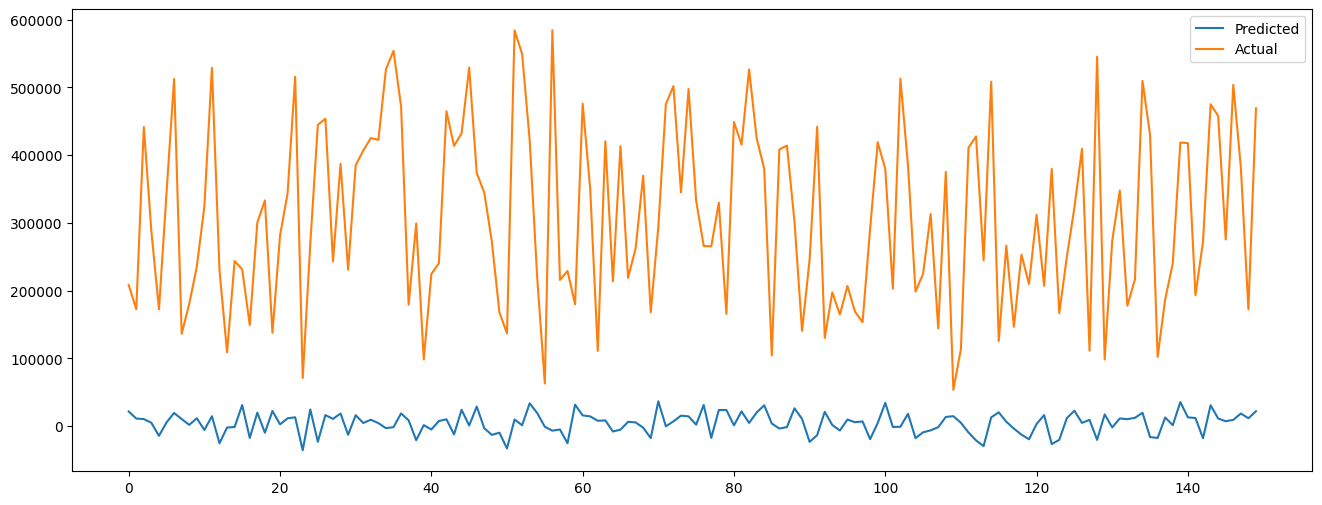

In [195]:
plt.figure(figsize=(16,6))
plt.plot(y_test_predicted)
plt.plot(y_test_actual)
plt.legend(['Predicted','Actual'])